   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-nu

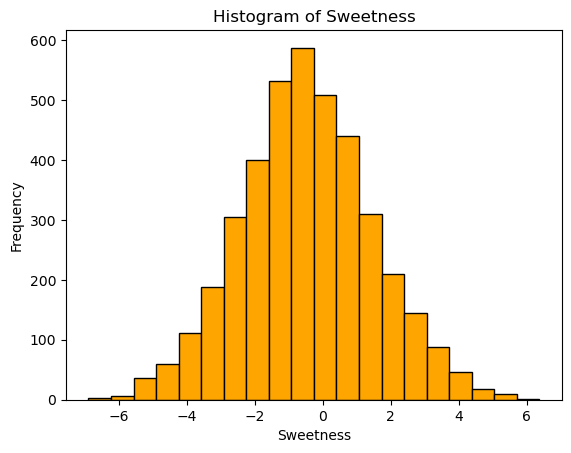

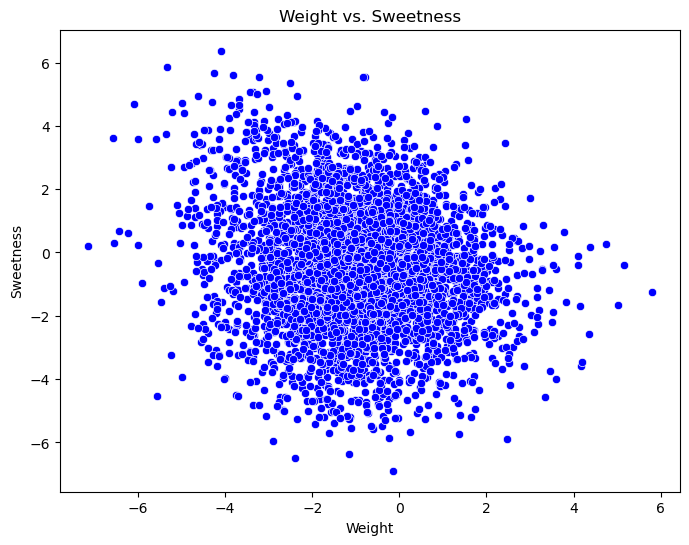

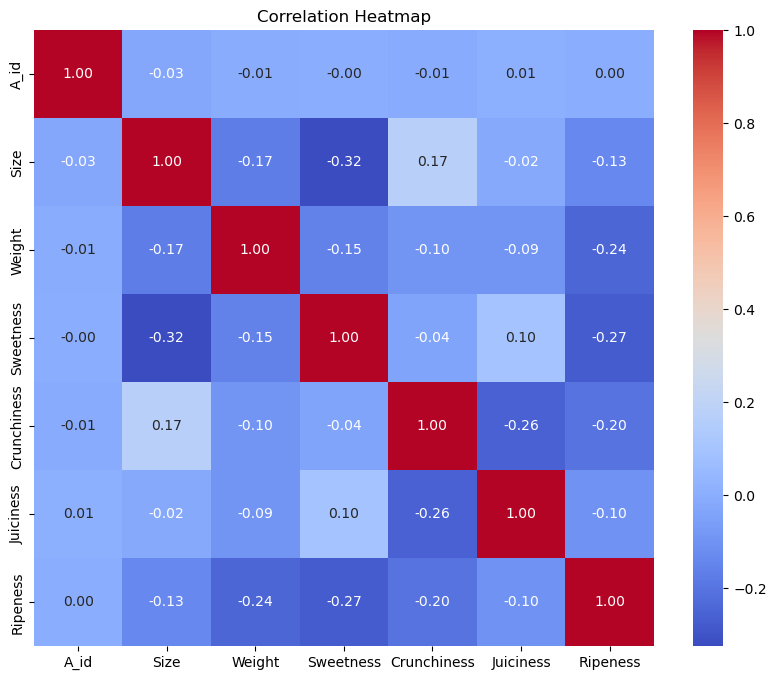

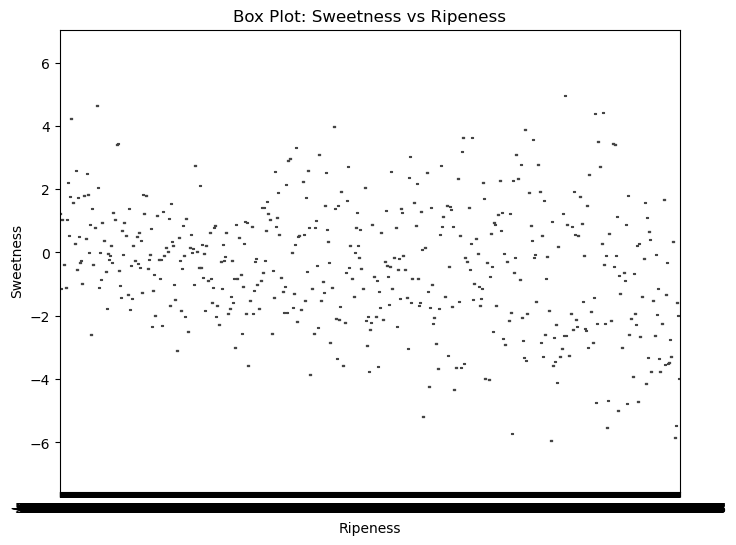

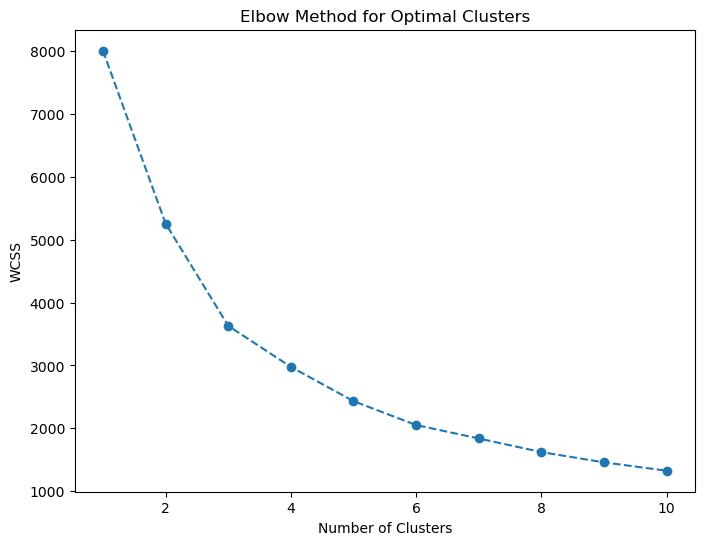

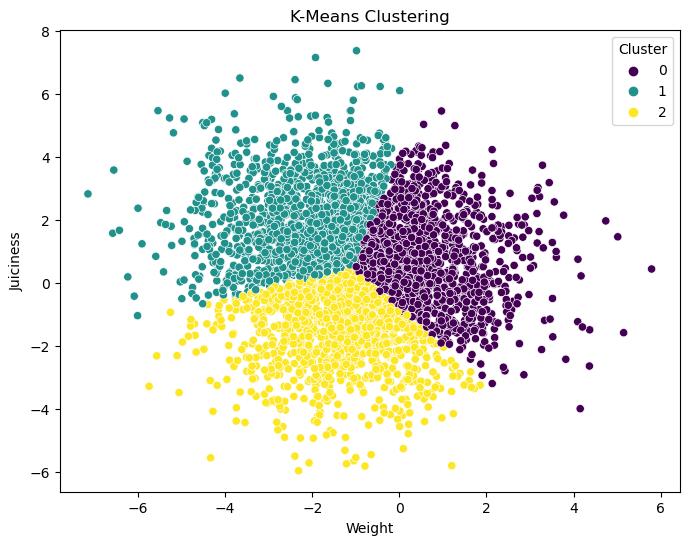

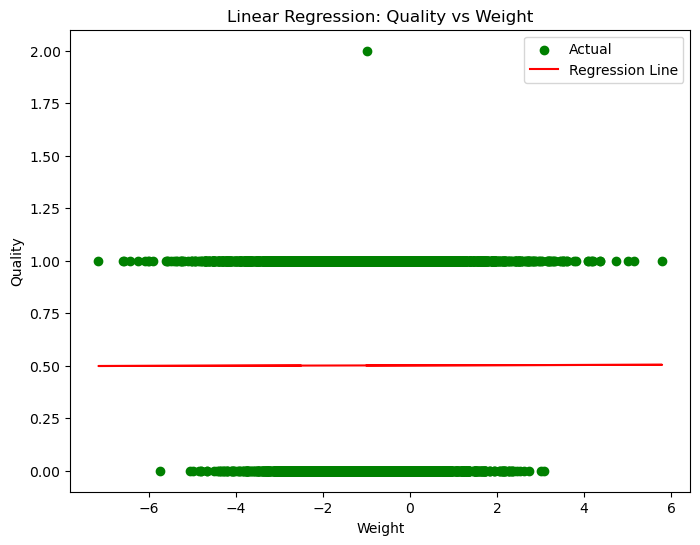

Coefficients: [[0.0004434]]
Intercept: [0.50181342]
Mean Squared Error: 0.25049748071654676
R² Score: 2.0145257965120678e-06


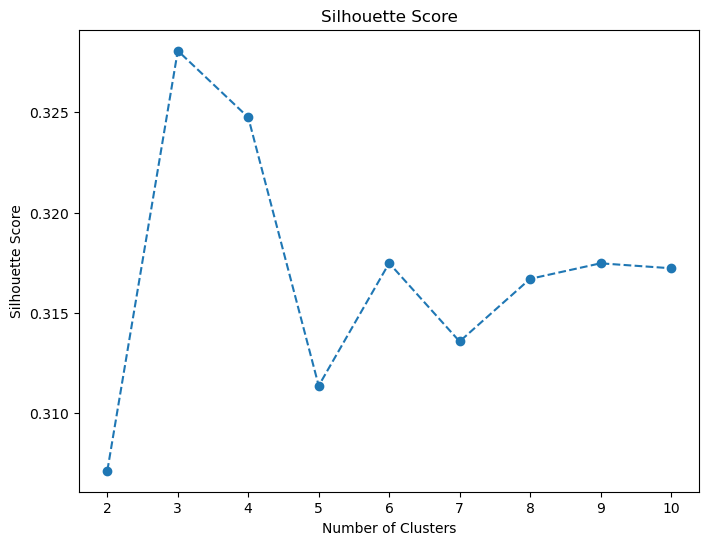

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("apple_quality.csv")

# Display the first few rows of the dataset
print(df.head())

# Summary of the dataset
print(df.info())

# Histogram function
def create_histogram(data, column_name, bins=10):
    plt.hist(data[column_name], bins=bins, color='orange', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Example usage
create_histogram(df, 'Sweetness', bins=20)

# Scatter plot function
def create_scatter_plot(data, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_column, y=y_column, data=data, color='blue')
    plt.title(f'{x_column} vs. {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example usage
create_scatter_plot(df, 'Weight', 'Sweetness')

# Heatmap function
def create_heatmap(data):
    numeric_data = data.select_dtypes(include='number')
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

# Example usage
create_heatmap(df)

# Box plot function
def create_box_plot(data, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x_column, y=y_column, data=data)
    plt.title(f'Box Plot: {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example usage
create_box_plot(df, 'Ripeness', 'Sweetness')

# K-Means Clustering
def kmeans_clustering(data, features, n_clusters=3):
    # Handle missing values by imputation (mean strategy)
    imputer = SimpleImputer(strategy='mean')
    data[features] = imputer.fit_transform(data[features])
    
    X = data[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Elbow method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # Plot the elbow method
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Fit K-Means
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    data['Cluster'] = kmeans.fit_predict(X_scaled)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=features[0], y=features[1], hue='Cluster', data=data, palette='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Cluster')
    plt.show()

# Example usage
kmeans_clustering(df, ['Weight', 'Juiciness'])


def linear_regression_fit(data, x_column, y_column):
    # Handle missing values for features
    imputer = SimpleImputer(strategy='mean')
    X = data[[x_column]].values
    y = data[y_column].values
    
    # Impute missing values for features
    X_imputed = imputer.fit_transform(X)

    # Encode categorical target variable 'y'
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)  # Convert categorical target to numeric

    # Impute missing values for the target variable (after encoding)
    y_imputed = imputer.fit_transform(y_encoded.reshape(-1, 1))  # Impute missing target values
    
    # Initialize the linear regression model
    model = LinearRegression()
    model.fit(X_imputed, y_imputed)

    # Predictions
    y_pred = model.predict(X_imputed)

    # Plotting the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X_imputed, y_imputed, color='green', label='Actual')
    plt.plot(X_imputed, y_pred, color='red', label='Regression Line')
    plt.title(f'Linear Regression: {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()

    # Displaying model metrics
    print(f'Coefficients: {model.coef_}')
    print(f'Intercept: {model.intercept_}')
    print(f'Mean Squared Error: {mean_squared_error(y_imputed, y_pred)}')
    print(f'R² Score: {r2_score(y_imputed, y_pred)}')

# Example usage
linear_regression_fit(df, 'Weight', 'Quality')



# Silhouette Score Plot
def plot_silhouette_score(data, features, max_clusters=10):
    # Handle missing values by imputation (mean strategy)
    imputer = SimpleImputer(strategy='mean')
    data[features] = imputer.fit_transform(data[features])
    
    X = data[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot silhouette scores
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Example usage
plot_silhouette_score(df, ['Sweetness', 'Crunchiness'])


In [2]:
#Descriptive Statistics
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Cluster
count,4000.000000,4000.000000,4001.000000,4001.000000,4001.000000,4001.000000,4000.000000,4001.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.965509
std,1154.844867,1.928059,1.602307,1.943198,1.402582,1.930044,1.874427,0.811055
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,0.000000
25%,999.750000,-1.816765,-2.011767,-1.738424,0.062865,-0.801238,-0.771677,0.000000
50%,1999.500000,-0.513703,-0.984984,-0.504307,0.997933,0.533504,0.503445,1.000000
75%,2999.250000,0.805526,0.029773,0.801810,1.893586,1.835903,1.766212,2.000000
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,2.000000


In [3]:
# Compute the correlation matrix
numeric_cols = df.select_dtypes(include='number') 
correlation_matrix = numeric_cols.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  \
A_id         1.000000 -0.028911 -0.005730  -0.002378    -0.013111   0.006179   
Size        -0.028911  1.000000 -0.170702  -0.324680     0.169868  -0.018892   
Weight      -0.005730 -0.170702  1.000000  -0.154246    -0.095882  -0.092263   
Sweetness   -0.002378 -0.324680 -0.154246   1.000000    -0.037552   0.095882   
Crunchiness -0.013111  0.169868 -0.095882  -0.037552     1.000000  -0.259607   
Juiciness    0.006179 -0.018892 -0.092263   0.095882    -0.259607   1.000000   
Ripeness     0.000742 -0.134773 -0.243824  -0.273800    -0.201982  -0.097144   
Cluster      0.007131  0.094488 -0.499260  -0.018718     0.189742  -0.472813   

             Ripeness   Cluster  
A_id         0.000742  0.007131  
Size        -0.134773  0.094488  
Weight      -0.243824 -0.499260  
Sweetness   -0.273800 -0.018718  
Crunchiness -0.201982  0.189742  
Juiciness   -0.097144 -0.472813  
Ripeness     1.00000